In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 

In [2]:
boston_dataset=datasets.load_boston()

In [3]:
boston_df=pd.DataFrame(boston_dataset.data)
boston_df.columns=boston_dataset.feature_names
boston_df_target=np.asarray(boston_dataset.target)
boston_df["House Price"]=pd.Series(boston_df_target)

In [4]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


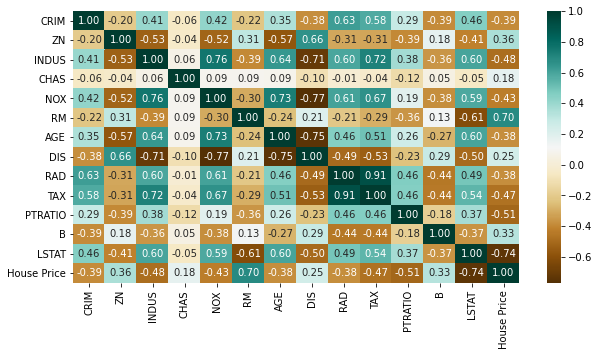

In [8]:
plt.subplots(figsize=(10,5))
sns.heatmap(boston_df.corr(),cmap="BrBG",annot=True,fmt=".2f")

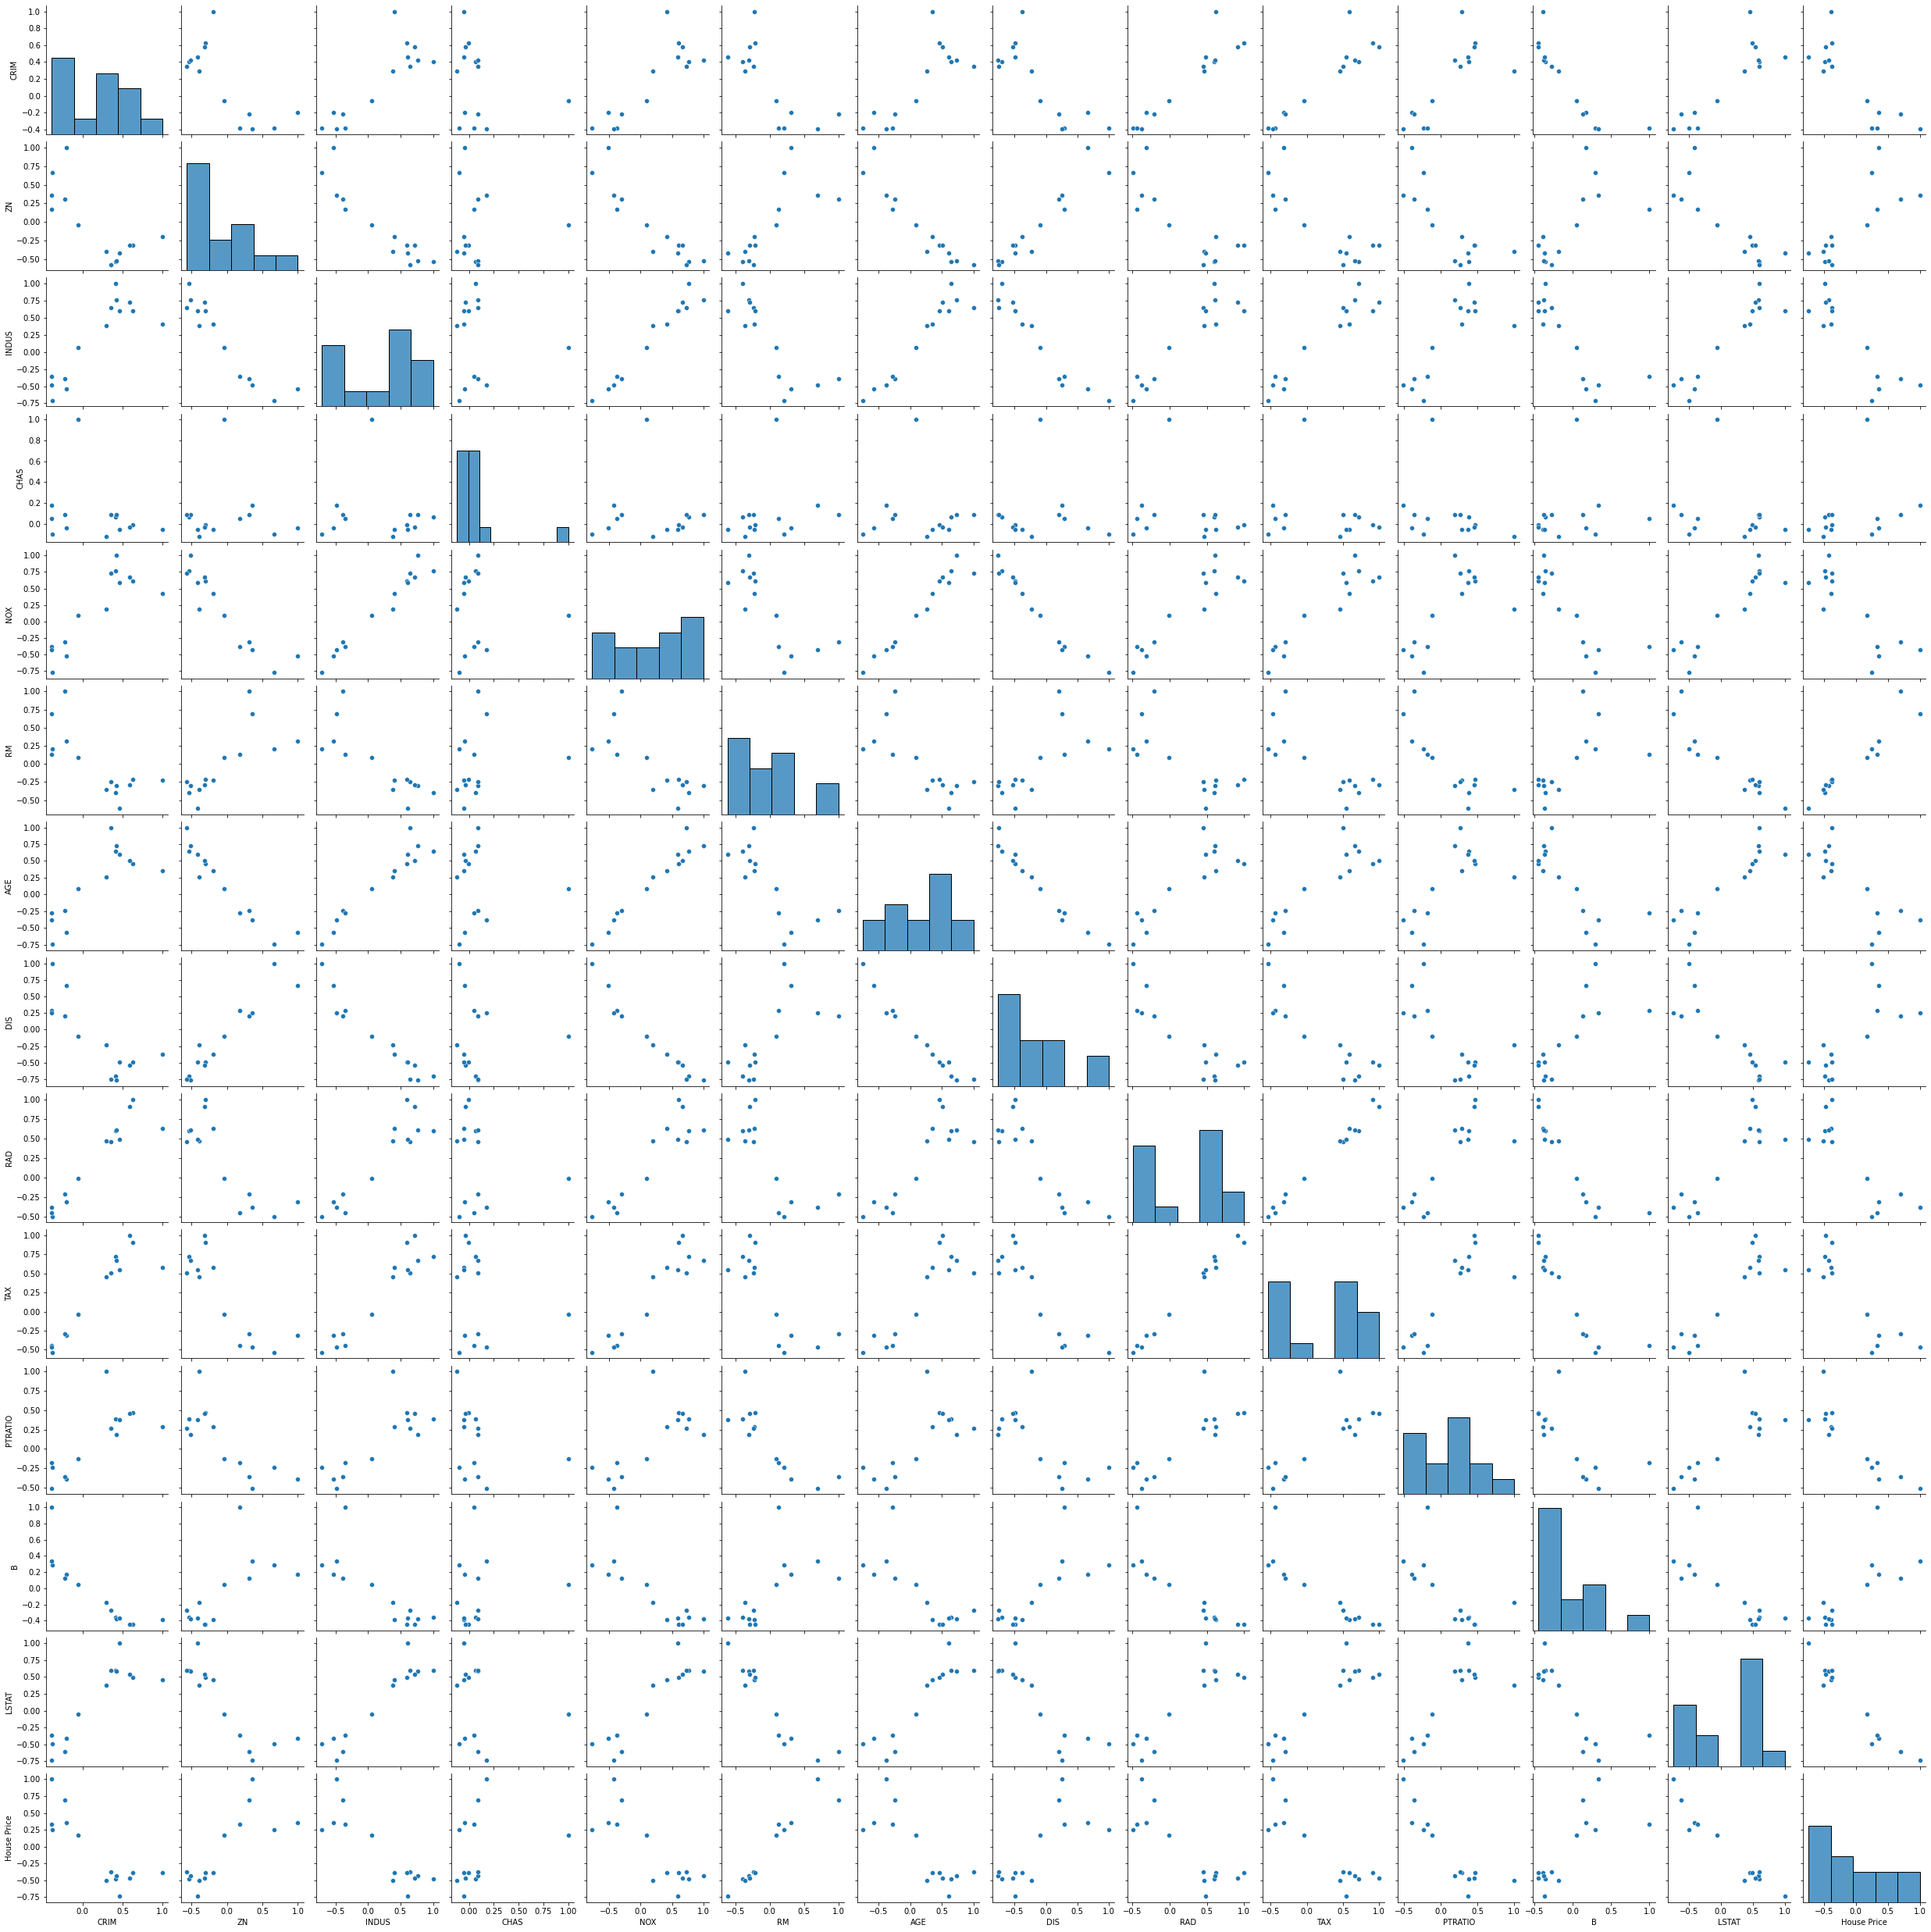

In [6]:
sns.pairplot(boston_df.corr())

In [7]:
X=boston_df.iloc[:,:-1]
y=boston_df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)
print("Train data shape of X= % s and y = % s"%(X_train.shape,y_train.shape))
print("Test data shape of X= % s and y = % s"%(X_test.shape,y_test.shape))

Train data shape of X= (379, 13) and y = (379,)
Test data shape of X= (127, 13) and y = (127,)


In [10]:
#Apply multiplelinear Regression model
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Generate prediction on test
y_pred=lreg.predict(X_test)

In [12]:
#Calculate Mean Squared error(MSE)
mean_squared_error=np.mean((y_pred-y_test)**2)
print("Mean squared error ",mean_squared_error)

Mean squared error  24.22900784782266


In [23]:
#Putting together the coefficient and their corresponding variable names
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=X_train.columns
lreg_coefficient["Coefficient estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

    Columns  Coefficient estimate
0      CRIM             -0.102714
1        ZN              0.045041
2     INDUS              0.056962
3      CHAS              2.004097
4       NOX            -21.322851
5        RM              3.305988
6       AGE              0.009084
7       DIS             -1.497183
8       RAD              0.304032
9       TAX             -0.012864
10  PTRATIO             -0.937520
11        B              0.007839
12    LSTAT             -0.555535


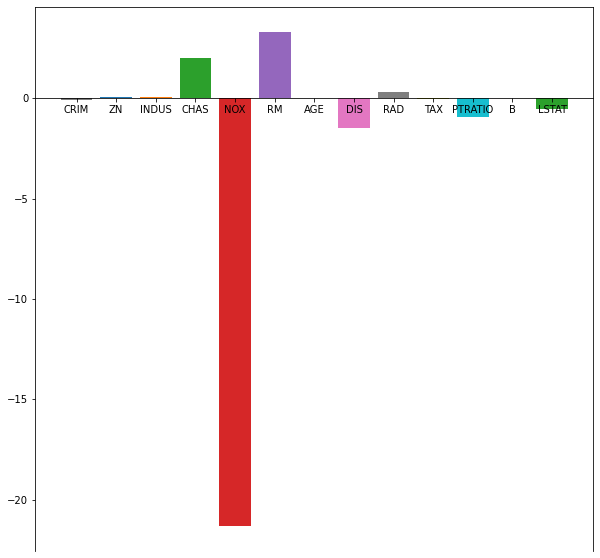

In [14]:
fix,ax=plt.subplots(figsize=(10,10))
color=['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple',
       'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(lreg_coefficient["Columns"],
      lreg_coefficient["Coefficient estimate"],
      color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

#Train the model
ridgeR=Ridge(alpha=1)
ridgeR.fit(X_train,y_train)
y_pred_ridge=ridgeR.predict(X_test)

In [16]:
#Calculate mean square error
mean_squared_error_ridge=np.mean((y_pred_ridge-y_test)**2)
print("Mean squared error on test set",mean_squared_error_ridge)

Mean squared error on test set 23.741973134695385


In [17]:
#Get ridge coeff and print them
ridge_coeff=pd.DataFrame()
ridge_coeff["Columns"]= X_train.columns
ridge_coeff["Coefficient estimate"]=pd.Series(ridgeR.coef_)
print(ridge_coeff)

    Columns  Coefficient estimate
0      CRIM             -0.096609
1        ZN              0.046228
2     INDUS              0.015590
3      CHAS              1.697324
4       NOX            -11.510828
5        RM              3.406571
6       AGE              0.000762
7       DIS             -1.345382
8       RAD              0.280519
9       TAX             -0.013519
10  PTRATIO             -0.831583
11        B              0.008554
12    LSTAT             -0.566040


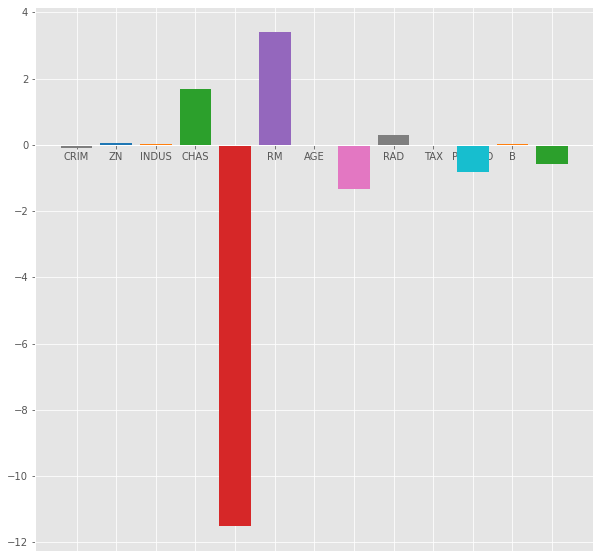

In [18]:
fix,ax=plt.subplots(figsize=(10,10))
color=['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple',
       'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(ridge_coeff["Columns"],
      ridge_coeff["Coefficient estimate"],
      color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

#Train the model
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)

In [20]:
#Calculate mean square error
mean_squared_error=np.mean((y_pred1-y_test)**2)
print("Mean squared error on test set",mean_squared_error)

lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]= X_train.columns
lasso_coeff["Coefficient estimate"]=pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared error on test set 32.092790327980225
    Columns  Coefficient estimate
0      CRIM             -0.052401
1        ZN              0.046602
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.672013
6       AGE              0.021168
7       DIS             -0.630309
8       RAD              0.234816
9       TAX             -0.014702
10  PTRATIO             -0.615542
11        B              0.007639
12    LSTAT             -0.769434


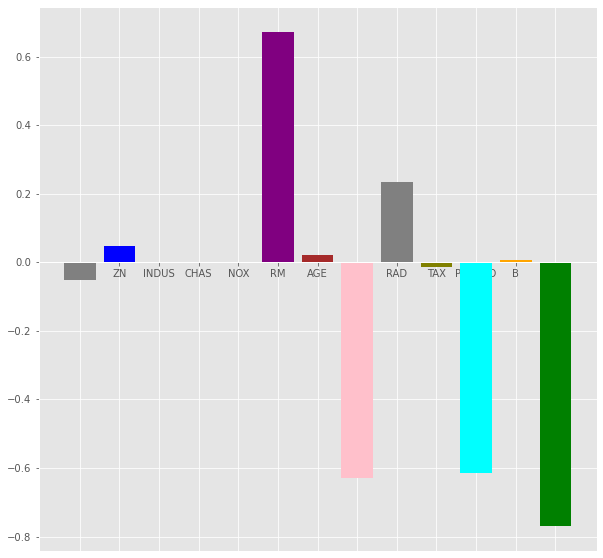

In [21]:
fix,ax=plt.subplots(figsize=(10,10))
color=['gray','blue','orange','green','red','purple',
       'brown','pink','gray','olive','cyan',
      'orange','green','blue','olive']

ax.bar(lasso_coeff["Columns"],
      lasso_coeff["Coefficient estimate"],
      color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()